In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("bank+marketing/bank/bank-full.csv", delimiter =";" )
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
columns = ['age', 'job', 'marital', 'education',  'balance', 'housing',
        'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']
columns

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [8]:
df = df[columns]
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df["education"].mode()

0    secondary
Name: education, dtype: object

In [11]:
df["education"].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [12]:
numerical_columns = df.copy()
numerical_columns = df.select_dtypes(include =["int", "float"]).columns.tolist()
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [13]:
data_numerical_columns = df[numerical_columns]
data_numerical_columns

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [14]:
data_numerical_columns.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
data_numerical_columns.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: >

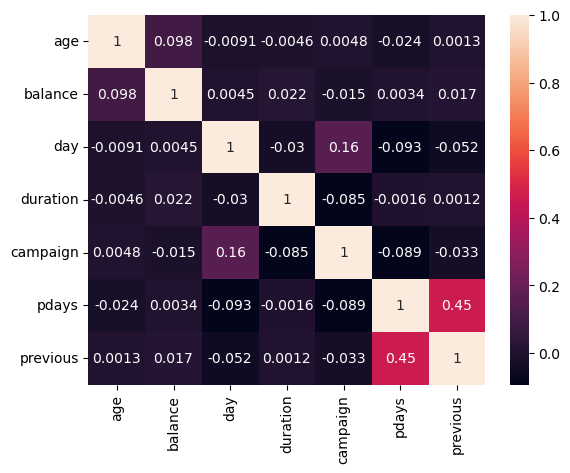

In [16]:
import seaborn as sns
sns.heatmap(data_numerical_columns.corr(),annot = True)

<Axes: >

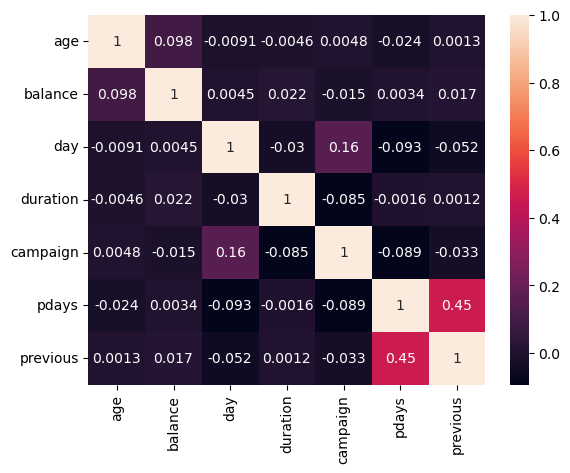

In [17]:
import seaborn as sns
sns.heatmap(data_numerical_columns.corr(), annot = True)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mutual_info_score

In [19]:
df.y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [20]:
df.y =(df.y == "yes").astype(int)
df.y

C:\Users\ACE\AppData\Local\Temp\ipykernel_4740\3169463248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.y =(df.y == "yes").astype(int)


0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [21]:
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


In [22]:
seed = 42

In [23]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = seed)
len(df_full_train), len(df_test)

(36168, 9043)

In [24]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = seed)
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [25]:
df_train

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
20326,32,technician,single,tertiary,1100,yes,cellular,11,aug,67,1,-1,0,unknown,0
24301,38,entrepreneur,married,secondary,0,yes,cellular,17,nov,258,1,-1,0,unknown,0
38618,49,blue-collar,married,secondary,3309,yes,cellular,15,may,349,2,-1,0,unknown,0
18909,37,housemaid,married,primary,2410,no,cellular,4,aug,315,1,-1,0,unknown,0
23081,31,self-employed,married,tertiary,3220,no,cellular,26,aug,74,4,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13264,27,services,single,secondary,167,no,cellular,8,jul,606,2,-1,0,unknown,0
28829,40,technician,single,tertiary,693,no,cellular,30,jan,427,1,-1,0,unknown,0
3844,54,technician,divorced,secondary,0,yes,unknown,16,may,161,1,-1,0,unknown,0
15597,25,services,single,secondary,2311,no,cellular,21,jul,1105,2,-1,0,unknown,1


In [26]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [27]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [28]:
y_train

array([0, 0, 0, ..., 0, 1, 0])

In [29]:
y_val

array([0, 0, 1, ..., 0, 0, 1])

In [30]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
df_full_train = df_full_train.reset_index(drop =True)
df_full_train

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,41,blue-collar,married,primary,849,yes,unknown,15,may,72,1,-1,0,unknown,0
1,49,technician,married,primary,1415,yes,cellular,30,jul,269,2,-1,0,unknown,0
2,42,admin.,married,secondary,3842,no,cellular,31,jul,130,4,-1,0,unknown,0
3,37,management,single,tertiary,-119,yes,unknown,11,jun,375,11,-1,0,unknown,0
4,56,blue-collar,married,primary,3498,no,cellular,15,apr,264,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,44,housemaid,single,primary,1059,no,unknown,18,jun,2093,1,-1,0,unknown,1
36164,23,student,single,tertiary,508,no,cellular,8,sep,210,1,92,1,failure,0
36165,34,technician,divorced,tertiary,1317,yes,cellular,15,may,239,1,-1,0,unknown,0
36166,33,retired,married,secondary,165,no,unknown,7,may,111,1,-1,0,unknown,0


In [32]:
df_full_train.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [33]:
from sklearn.metrics import mutual_info_score

In [34]:
mutual_info_score(df_train.y, df_train.age)

np.float64(0.012937835538587615)

In [35]:
mutual_info_score(df_train.y, df_train.day)

np.float64(0.0063998575390331516)

In [36]:
categorical_variables = df.select_dtypes(include = ["object"]).columns.tolist()
categorical_variables

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [37]:
def total_mi(series):
    return mutual_info_score(series, df_train.y)
    
mi = df_train[categorical_variables].apply(total_mi)
    

In [38]:
mi

job          0.007316
marital      0.002050
education    0.002697
housing      0.010343
contact      0.013356
month        0.025090
poutcome     0.029533
dtype: float64

In [39]:
df_mi = mi.sort_values(ascending = False)
df_mi

poutcome     0.029533
month        0.025090
contact      0.013356
housing      0.010343
job          0.007316
education    0.002697
marital      0.002050
dtype: float64

In [40]:
df_mi = mi.sort_values(ascending = False)
df_mi

poutcome     0.029533
month        0.025090
contact      0.013356
housing      0.010343
job          0.007316
education    0.002697
marital      0.002050
dtype: float64

In [41]:
df_train

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,32,technician,single,tertiary,1100,yes,cellular,11,aug,67,1,-1,0,unknown,0
1,38,entrepreneur,married,secondary,0,yes,cellular,17,nov,258,1,-1,0,unknown,0
2,49,blue-collar,married,secondary,3309,yes,cellular,15,may,349,2,-1,0,unknown,0
3,37,housemaid,married,primary,2410,no,cellular,4,aug,315,1,-1,0,unknown,0
4,31,self-employed,married,tertiary,3220,no,cellular,26,aug,74,4,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27121,27,services,single,secondary,167,no,cellular,8,jul,606,2,-1,0,unknown,0
27122,40,technician,single,tertiary,693,no,cellular,30,jan,427,1,-1,0,unknown,0
27123,54,technician,divorced,secondary,0,yes,unknown,16,may,161,1,-1,0,unknown,0
27124,25,services,single,secondary,2311,no,cellular,21,jul,1105,2,-1,0,unknown,1


In [42]:
df_train = df_train.drop("y", axis = 1)
df_val = df_val.drop("y", axis =1)
df_test = df_test.drop("y", axis =1)

In [43]:
df_train

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,technician,single,tertiary,1100,yes,cellular,11,aug,67,1,-1,0,unknown
1,38,entrepreneur,married,secondary,0,yes,cellular,17,nov,258,1,-1,0,unknown
2,49,blue-collar,married,secondary,3309,yes,cellular,15,may,349,2,-1,0,unknown
3,37,housemaid,married,primary,2410,no,cellular,4,aug,315,1,-1,0,unknown
4,31,self-employed,married,tertiary,3220,no,cellular,26,aug,74,4,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27121,27,services,single,secondary,167,no,cellular,8,jul,606,2,-1,0,unknown
27122,40,technician,single,tertiary,693,no,cellular,30,jan,427,1,-1,0,unknown
27123,54,technician,divorced,secondary,0,yes,unknown,16,may,161,1,-1,0,unknown
27124,25,services,single,secondary,2311,no,cellular,21,jul,1105,2,-1,0,unknown


In [44]:
df_val

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38,services,divorced,secondary,-10,yes,unknown,17,jun,61,2,-1,0,unknown
1,42,management,single,tertiary,1146,yes,unknown,15,may,98,2,-1,0,unknown
2,43,management,married,tertiary,149,yes,unknown,23,jun,662,2,-1,0,unknown
3,50,management,married,tertiary,8205,yes,telephone,25,oct,293,3,508,1,other
4,43,management,married,tertiary,79,no,cellular,26,may,640,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9037,47,technician,married,secondary,356,no,cellular,29,jul,44,5,-1,0,unknown
9038,32,admin.,married,secondary,1604,no,cellular,7,jul,625,1,-1,0,unknown
9039,45,admin.,married,secondary,857,yes,cellular,21,nov,169,1,92,20,other
9040,40,admin.,married,secondary,153,yes,unknown,14,may,159,2,-1,0,unknown


In [45]:
df_test

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40,blue-collar,married,secondary,580,yes,unknown,16,may,192,1,-1,0,unknown
1,47,services,single,secondary,3644,no,unknown,9,jun,83,2,-1,0,unknown
2,25,student,single,tertiary,538,yes,cellular,20,apr,226,1,-1,0,unknown
3,42,management,married,tertiary,1773,no,cellular,9,apr,311,1,336,1,failure
4,56,management,married,tertiary,217,no,cellular,21,jul,121,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,47,management,married,tertiary,1890,no,cellular,8,jul,161,1,-1,0,unknown
9039,32,blue-collar,single,secondary,217,yes,cellular,15,may,692,3,-1,0,unknown
9040,52,admin.,divorced,secondary,0,yes,unknown,26,may,206,1,-1,0,unknown
9041,40,admin.,divorced,secondary,783,yes,unknown,16,may,171,2,-1,0,unknown


In [46]:
from sklearn.feature_extraction import DictVectorizer

In [47]:
columns

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [48]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [49]:
column = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']

In [50]:
train_dict = df_train[column + categorical_variables].to_dict(orient = "records")
dv = DictVectorizer (sparse = True)
X_train = dv.fit_transform(train_dict)
X_train

C:\Users\ACE\AppData\Local\Temp\ipykernel_4740\3753668452.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dict = df_train[column + categorical_variables].to_dict(orient = "records")


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 379764 stored elements and shape (27126, 47)>

In [51]:
val_dict = df_val[column + categorical_variables].to_dict(orient = "records")
X_val = dv.transform(val_dict)
X_val

C:\Users\ACE\AppData\Local\Temp\ipykernel_4740\517279781.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dict = df_val[column + categorical_variables].to_dict(orient = "records")


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 126588 stored elements and shape (9042, 47)>

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [54]:
model.intercept_[0]

np.float64(-0.9075237913978677)

In [55]:
model.coef_[0]

array([-1.93107469e-03,  1.20180778e-05, -7.97024859e-02,  2.47478390e-01,
        7.08852132e-02, -1.22588739e+00,  6.32976822e-03,  4.09077412e-03,
       -4.18089186e-01, -2.31264255e-01, -7.21824016e-02, -1.85987948e-01,
       -1.02131214e-01, -8.05392577e-01,  7.42917279e-02, -2.41069768e-01,
       -2.39911224e-01, -2.79294417e-01, -9.22710466e-02,  3.35661105e-01,
       -2.72549892e-01, -1.53141563e-01,  2.41827877e-01, -1.63249738e-01,
        1.56605205e-02, -1.33477374e-01, -2.96441505e-01, -4.46888617e-01,
       -1.64193670e-01,  7.62787618e-02, -6.72990605e-01,  3.17647594e-01,
       -3.14073035e-01, -9.45058495e-01, -9.48025611e-01,  2.61656782e-01,
        1.24416515e+00, -4.73490293e-01, -8.99876651e-01,  7.35502198e-01,
        7.10740412e-01, -7.71637493e-04, -7.64354203e-01, -5.45436524e-01,
        1.48721872e+00, -1.08495178e+00,  2.90939589e-03])

In [56]:
model.predict_proba(X_train)

array([[0.96791645, 0.03208355],
       [0.96635336, 0.03364664],
       [0.93301573, 0.06698427],
       ...,
       [0.99016106, 0.00983894],
       [0.24409825, 0.75590175],
       [0.86642384, 0.13357616]])

In [57]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.01315207, 0.01039464, 0.14683511, ..., 0.05419486, 0.00999035,
       0.2869727 ])

In [58]:
churns_decision = y_pred >= 0.5
churns_decision

array([False, False, False, ..., False, False, False])

In [59]:
y_val

array([0, 0, 1, ..., 0, 0, 1])

In [60]:
accuracy = (y_val == churns_decision).mean()

In [61]:
accuracy

np.float64(0.9011280690112807)

In [62]:
df_pred = pd.DataFrame()
df_pred["propability"] = y_pred
df_pred["prediction"] = churns_decision.astype(int)
df_pred["actual"] = y_val
df_pred["correct"] = df_pred.prediction == df_pred.actual
df_pred

,propability,prediction,actual,correct
0,0.013152,0,0,True
1,0.010395,0,0,True
2,0.146835,0,1,False
3,0.208729,0,0,True
4,0.423039,0,1,False
...,...,...,...,...
9037,0.022816,0,0,True
9038,0.285076,0,1,False
9039,0.054195,0,0,True
9040,0.009990,0,0,True


In [63]:
df_pred.mean()

propability    0.118055
prediction     0.060827
actual         0.118337
correct        0.901128
dtype: float64

In [64]:
df_pred.correct.mean()

np.float64(0.9011280690112807)

In [65]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [66]:
list(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

[('age', np.float64(-0.002)),
 ('balance', np.float64(0.0)),
 ('campaign', np.float64(-0.08)),
 ('contact=cellular', np.float64(0.247)),
 ('contact=telephone', np.float64(0.071)),
 ('contact=unknown', np.float64(-1.226)),
 ('day', np.float64(0.006)),
 ('duration', np.float64(0.004)),
 ('education=primary', np.float64(-0.418)),
 ('education=secondary', np.float64(-0.231)),
 ('education=tertiary', np.float64(-0.072)),
 ('education=unknown', np.float64(-0.186)),
 ('housing=no', np.float64(-0.102)),
 ('housing=yes', np.float64(-0.805)),
 ('job=admin.', np.float64(0.074)),
 ('job=blue-collar', np.float64(-0.241)),
 ('job=entrepreneur', np.float64(-0.24)),
 ('job=housemaid', np.float64(-0.279)),
 ('job=management', np.float64(-0.092)),
 ('job=retired', np.float64(0.336)),
 ('job=self-employed', np.float64(-0.273)),
 ('job=services', np.float64(-0.153)),
 ('job=student', np.float64(0.242)),
 ('job=technician', np.float64(-0.163)),
 ('job=unemployed', np.float64(0.016)),
 ('job=unknown', np.fl

In [67]:
small_features = ["age", "balance", "campaign"]
small_features

['age', 'balance', 'campaign']

In [68]:
df_train[["age", "balance", "campaign"]].iloc[:10].to_dict(orient = "records")

[{'age': 32, 'balance': 1100, 'campaign': 1},
 {'age': 38, 'balance': 0, 'campaign': 1},
 {'age': 49, 'balance': 3309, 'campaign': 2},
 {'age': 37, 'balance': 2410, 'campaign': 1},
 {'age': 31, 'balance': 3220, 'campaign': 4},
 {'age': 32, 'balance': 11287, 'campaign': 7},
 {'age': 35, 'balance': 0, 'campaign': 2},
 {'age': 39, 'balance': -17, 'campaign': 1},
 {'age': 60, 'balance': 2934, 'campaign': 2},
 {'age': 48, 'balance': 3, 'campaign': 2}]

In [69]:
columns

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [70]:
categorical_variables

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [71]:
from sklearn.metrics import roc_auc_score, roc_curve

In [72]:
df.dtypes[df.dtypes != "object"].index

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

In [73]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [74]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [75]:
numerical_variables = df.select_dtypes(include = ["int"]).columns.tolist()
numerical_variables

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

In [76]:
numerical_variables = [ "age", "balance", "day", "duration", "campaign", "pdays", "previous"]
for c in numerical_variables:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
        print(c, auc)

age 0.5072154616891561
day 0.5250167906149042
campaign 0.5682816518810498


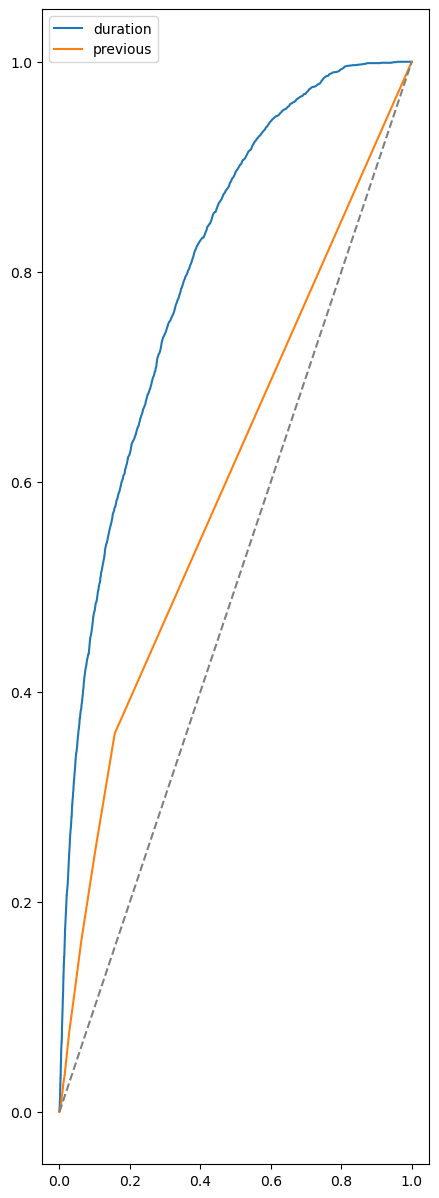

In [77]:
plt.figure(figsize = (5, 15))

fpr, tpr , thresholds = roc_curve(y_train, df_train.duration)
plt.plot(fpr, tpr, label = "duration")

fpr, tpr,thresholds,  = roc_curve(y_train, df_train.previous)
plt.plot(fpr, tpr, label = "previous")

plt.plot([0,1], [0,1], color = "grey", linestyle = "--")
plt.legend()
plt.show()

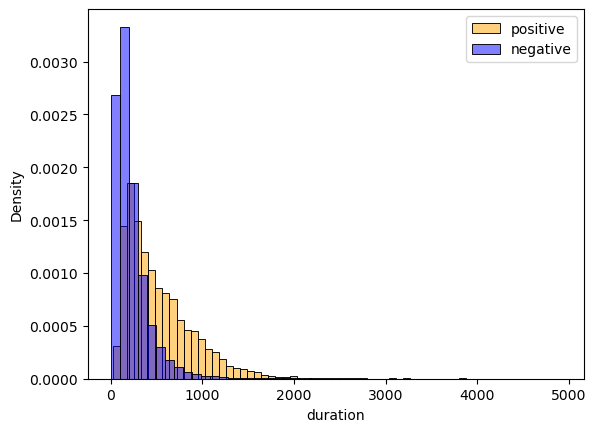

In [78]:
sns.histplot(df_train.duration[y_train ==1],
             stat = "density", bins = 50,
             color = "orange", alpha = 0.5,
             label = "positive")
sns.histplot(df_train.duration[y_train == 0],
             stat = "density", bins = 50,
             color = "blue", alpha = 0.5,
             label = "negative")
plt.legend()
plt.show()

In [79]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [80]:
train_dicts = df_train.to_dict(orient = "records")
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver = "liblinear", C = 1.0, max_iter = 1000)

model.fit(X_train, y_train)

val_dict = df_val.to_dict(orient = "records")
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]

In [81]:
roc_auc_score(y_val, y_pred)

np.float64(0.9106675935868997)

In [82]:
## precision and Accuracy

In [83]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)
    for t in thresholds:
        actual_positive = (y_val==1)
        actual_negative = (y_val==0)

        predicted_positive = (y_pred >=t)
        predicted_negative = (y_pred <t)

        tp = (actual_positive & predicted_positive).sum()
        tn = (actual_negative & predicted_negative).sum()

        fp = (predicted_positive & actual_negative).sum()
        fn = (predicted_negative & actual_positive).sum()


        

        scores.append((t, tp, fp, tn, fn))

        columns = ["threshold", "tp", "fp", "tn", "fn"]
        score = pd.DataFrame(scores, columns = columns)


    return score

        

In [84]:
score = confusion_matrix_dataframe(y_val, y_pred)

In [85]:
score[::10]

,threshold,tp,fp,tn,fn
0,0.0,1070,7972,0,0
10,0.1,935,1541,6431,135
20,0.2,729,682,7290,341
30,0.3,567,405,7567,503
40,0.4,454,275,7697,616
50,0.5,363,187,7785,707
60,0.6,284,125,7847,786
70,0.7,217,93,7879,853
80,0.8,145,61,7911,925
90,0.9,76,22,7950,994


In [86]:
score["p"] = score.tp / (score.tp + score.fp)
score["r"] = score.tp / (score.tp + score.fn)

In [87]:
score["p"]

0      0.118337
1      0.129686
2      0.152724
3      0.178331
4      0.208863
         ...   
96     0.686275
97     0.717391
98     0.689655
99     0.555556
100         NaN
Name: p, Length: 101, dtype: float64

In [88]:
score["r"]

0      1.000000
1      0.999065
2      0.998131
3      0.990654
4      0.982243
         ...   
96     0.032710
97     0.030841
98     0.018692
99     0.009346
100    0.000000
Name: r, Length: 101, dtype: float64

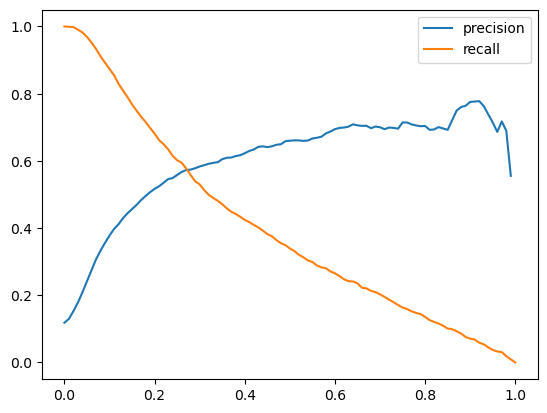

In [89]:
plt.plot(score.threshold, score.p , label = "precision")
plt.plot(score.threshold, score.r , label = "recall")

plt.legend()
plt.show()

In [90]:
## F1 score

In [91]:
score["f1"] = 2 * score.p * score.r / (score.p + score.r)

In [92]:
score.loc[score.f1.argmax()]

threshold       0.200000
tp            729.000000
fp            682.000000
tn           7290.000000
fn            341.000000
p               0.516655
r               0.681308
f1              0.587666
Name: 20, dtype: float64

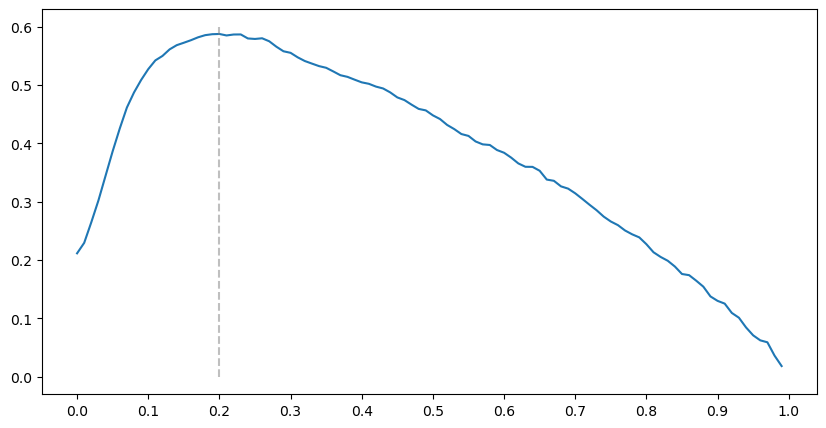

In [93]:
plt.figure(figsize = (10, 5))
plt.plot(score.threshold, score.f1)
plt.vlines(0.2, 0.0, 0.6, color = "grey", linestyle = "--", alpha = 0.5)

plt.xticks(np.linspace(0, 1, 11))
plt.show()


In [94]:
from sklearn.model_selection import KFold

In [95]:
columns = list(df.columns)
columns.remove("y")
columns

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [96]:
def train(df_train, y_train, C= 1.0):
    dicts = df_train[columns].to_dict(orient = "records")

    dv = DictVectorizer()
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver = "liblinear", C=C, max_iter = 1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient = "records")

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [97]:
scores = []

kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.y.values
    y_val = df_val.y.values

    dv, model = train(df_train, y_train, C= 1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

    print(np.mean(scores), np.std(scores))

0.9100550965463015 0.0
0.9078714987814054 0.0021835977648960725
0.9072468020111226 0.001989780115701921
0.9037019513250548 0.006377093212520807
0.9062714924104679 0.007677500884496707


In [98]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)
for C in [0.000001, 0.001, 1]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.y.values
        y_val = df_val.y.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

        print(C, np.mean(scores), np.std(scores))

1e-06 0.7013318934818628 0.0
1e-06 0.6977022732795131 0.003629620202349637
1e-06 0.7015477952433434 0.006193451398383637
1e-06 0.697628127372362 0.008652197340821472
1e-06 0.6949855682982436 0.009371280003309971
0.001 0.8638108583447328 0.0
0.001 0.8643386531648688 0.000527794820135985
0.001 0.864492307212705 0.00048262896128855784
0.001 0.8608942776617919 0.00624597053975101
0.001 0.8612095772727383 0.00562204355776453
1 0.9100550965463015 0.0
1 0.9078714987814054 0.0021835977648960725
1 0.9072468020111226 0.001989780115701921
1 0.9037019513250548 0.006377093212520807
1 0.9062714924104679 0.007677500884496707
